<a href="https://colab.research.google.com/github/shivanidhar29/CloudIoTRaspberry/blob/main/ShivaniD_ParetoChartForHelpdesk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
HelpdeskDF=pd.read_csv("/content/drive/MyDrive/HelpDesk.csv")
HelpdeskDF.head(5)







,reason,description,frequency
0,ERP,myIllinoinsState,7
1,VPN,connection from home,10
2,email,unable to message,18
3,PCs,office computers for staff/faculty,12
4,printer,unable to print,10


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
HelpdeskDF=pd.read_csv("/content/drive/MyDrive/HelpDesk.csv")
print(HelpdeskDF)


       reason                         description  frequency
0         ERP                    myIllinoinsState          7
1         VPN                connection from home         10
2       email                   unable to message         18
3         PCs  office computers for staff/faculty         12
4     printer                     unable to print         10
5    internet                   connection issues         22
6   ReggieNet            issues accesing features          8
7      mobile       mobile devices not connecting         14
8    password               password reset issues         11
9        VoIP  phone / voice message difficulties         15
10   hardware             general hardware issues         25
11  Office365             question accessing apps         13


In [5]:
HelpdeskDF.index = HelpdeskDF['reason']
HelpdeskDF = HelpdeskDF.sort_values(by ='frequency', ascending=False)
print(HelpdeskDF)

              reason                         description  frequency
reason                                                             
hardware    hardware             general hardware issues         25
internet    internet                   connection issues         22
email          email                   unable to message         18
VoIP            VoIP  phone / voice message difficulties         15
mobile        mobile       mobile devices not connecting         14
Office365  Office365             question accessing apps         13
PCs              PCs  office computers for staff/faculty         12
password    password               password reset issues         11
VPN              VPN                connection from home         10
printer      printer                     unable to print         10
ReggieNet  ReggieNet            issues accesing features          8
ERP              ERP                    myIllinoinsState          7


In [6]:
HelpdeskDF["CumulativePercentage"] = HelpdeskDF["frequency"].cumsum()/HelpdeskDF["frequency"].sum()*100
HelpdeskDF["CumulativePercentage"]=HelpdeskDF["CumulativePercentage"].apply(lambda x: round(x,2))
print(HelpdeskDF)

              reason                         description  frequency  \
reason                                                                
hardware    hardware             general hardware issues         25   
internet    internet                   connection issues         22   
email          email                   unable to message         18   
VoIP            VoIP  phone / voice message difficulties         15   
mobile        mobile       mobile devices not connecting         14   
Office365  Office365             question accessing apps         13   
PCs              PCs  office computers for staff/faculty         12   
password    password               password reset issues         11   
VPN              VPN                connection from home         10   
printer      printer                     unable to print         10   
ReggieNet  ReggieNet            issues accesing features          8   
ERP              ERP                    myIllinoinsState          7   

     

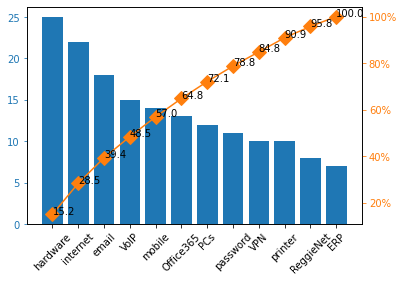

In [19]:




from matplotlib import colors
fig, ax =plt.subplots()
ax.bar(HelpdeskDF.index,HelpdeskDF["frequency"],color="C0")

ax.set_xticklabels(HelpdeskDF['reason'], rotation=45)

ax2 = ax.twinx()

ax2.plot(HelpdeskDF.index, HelpdeskDF["CumulativePercentage"], color="C1", marker="D", ms=10, label=HelpdeskDF["CumulativePercentage"])

ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

for index, v in HelpdeskDF.iterrows():
  label = round(v['CumulativePercentage'],1)
  plt.annotate(label, xy=(v['reason'],v['CumulativePercentage']))

plt.show();
